In [1]:
%%html
<style>
    table { display: inline-block }
</style>

---
## 3. Figures

Matplotlib provides two main interfaces for creating and customizing plots: 

+ the functional interface

+ the object-oriented interface 

In the previous section, we introduced the functional interface. This section focuses on the object-oriented interface, which gives you more control over the individual elements of a plot.

In the object-oriented interface, you create and manipulate `Figure` and `Axes` objects directly. By keeping track of these objects and calling their methods, you can create complex plots with multiple subplots and customize their appearance.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

---
### Contents

    3.1. Creating a Figure
    3.2. A Single Axes Object
    3.3. Customizing the Axes Object
    3.4. Setter Methods
    3.5. Multiple Axes  

---
### 3.1. Creating a Figure

In [4]:
fig = plt.figure()
plt.show()

<Figure size 640x480 with 0 Axes>

The figure does not contain anything to plot. Matplotlib shows a blank figure. Figures can be optionally customized by setting the following values:

| Argument      | Description 
|:------------- |:------------
| figsize       | tuple of figure (width, height) in inches 
| dpi           | figure resolution in dots per inch 
| facecolor     | figure background color 
| edgecolor     | figure border color 
| ...           | ... 

See [documentation](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure)  for further parameters and details. 


#### Example: Figures in `.py`-script mode

Along with this notebook, the lecture material includes a file `figure.py`. Run the `figure.py` script in the terminal:

```
    $ python figure.py
```

---
### 3.2. A Single `Axes` Object

To plot data, we need to create an `Axes` object - a region of the figure containing 
+ the x- and y-axis
+ tick-marks
+ labels
+ plot lines
+ markers
+ ...


#### Example:

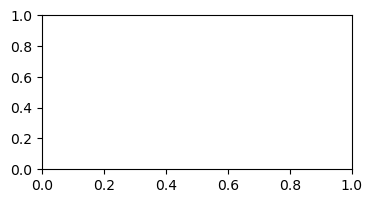

In [5]:
fig, ax = plt.subplots(figsize=(4,2))
plt.show()

### 3.3. Customizing the `Axes` Object


The next script 

+ plots the sine and cosine using `ax.plot` 

+ and customizes the `Axes` using `ax.set`

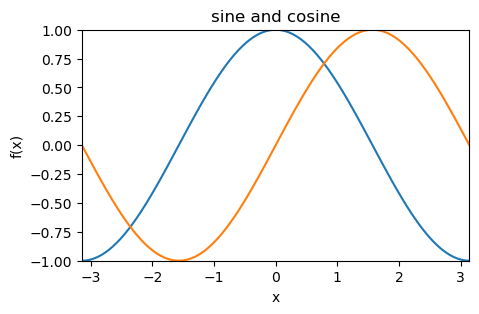

In [6]:
# create data
x = np.linspace(-np.pi, np.pi, 100)

# create Figure and Axes object
fig, ax = plt.subplots(figsize=(5,3))

# plot lines
ax.plot(x, np.cos(x), x, np.sin(x))

# set title, and axis-labels
ax.set(title='sine and cosine', xlabel='x', ylabel='f(x)')

# set x- and y-limits
ax.set(xlim=[-np.pi, +np.pi], ylim=[-1, +1])

# show figure
plt.show()

---
### 3.4. Setter-methods

Matplotlib objects typically have setter methods in the form of `set_<name>` to control specific options. To see a list of `Axes` attributes and methods that start with `set_`, type `ax.set_` in the next cell and use autocompletion (e.g. by pressing the <TAB> key). 

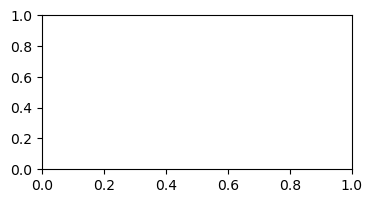

In [14]:
fig, ax = plt.subplots(figsize=(4,2))
#ax.set_
plt.show()

Using the explicit setter method, we can rewrite the script for plotting the sine and cosine function. 

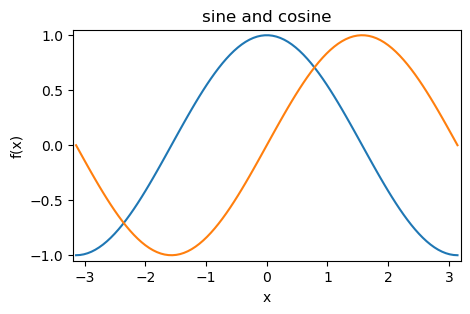

In [15]:
x = np.linspace(-np.pi, np.pi, 100)

fig, ax = plt.subplots(figsize=(5,3))
ax.plot(x, np.cos(x), x, np.sin(x))

# set title, and axis-labels
ax.set_title('sine and cosine')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')

# set x- and y-limits
ax.set_xlim([-np.pi-0.05, +np.pi+0.05])
ax.set_ylim([-1.05, +1.05])

plt.show()

#### **Generic setter or explicit setter?**

+ Generic setter : `set(<name>=value)`

+ Explicit setter: `set_<name>(value)`

The generic setter `ax.set` is less verbose and more compact. It takes each keyword argument and tries to call the corresponding explicit setter. This allows you to set multiple properties of an `Axes` object at once.

The explicit setter, on the other hand, allows you to set a specific property of an `Axes` object and provides more control over that property. For example:

```python
    ax.set_xlabel('x label', size=18)
```

This sets the x label and also controls its size, which cannot be done with the generic setter `ax.set`. 


---
### 3.5. Multiple Axes

A Figure can have multiple `Axes` objects. The `plt.subplots` function creates a `Figure` object and one or more `Axes` objects arranged in a grid. The simplified signature of the function is:

```python
    plt.subplots(nrows=1, ncols=1, **kwargs)
```

The arguments are:

+ `nrows`: number of rows in the subplot grid. Defaults to 1.

+ `ncols`: number of columns in the subplot grid. Defaults to 1.

+ `**kwargs`: additional optional arguments. 

One common argument `**kwargs` is `figsize`, which specifies the width and height of the figure in inches (see table above).

<br>

#### **Example:** `Figure` with 2 x 3 grid of `Axes` objects



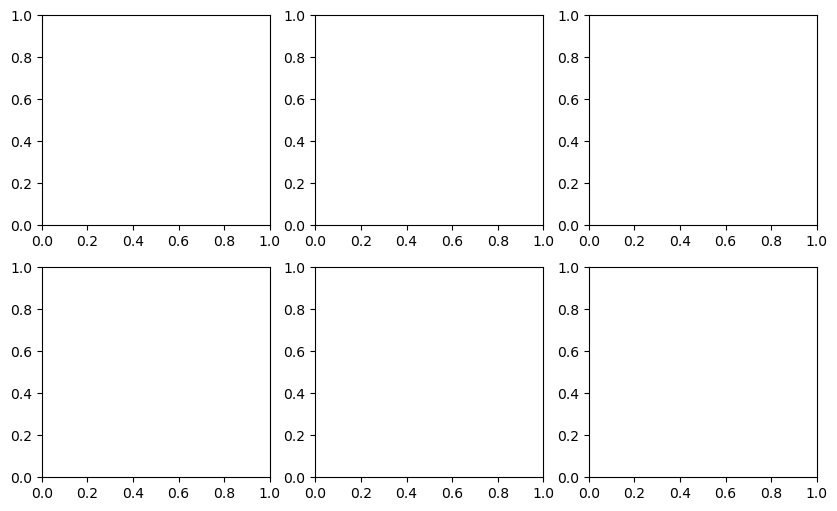

In [16]:
fig, axs = plt.subplots(2, 3, figsize=(10,6))
plt.show()

#### Inspecting `axs`

The `axs` object is a numpy array of shape $(2, 3)$. Each element of `axs` is an `Axes` object. 

In [17]:
print('Type of axs      :', type(axs))
print('Shape of axs     :', axs.shape)
print('Type of axs[0,0] :', type(axs[0, 0]))

Type of axs      : <class 'numpy.ndarray'>
Shape of axs     : (2, 3)
Type of axs[0,0] : <class 'matplotlib.axes._axes.Axes'>


#### Indexing Axes Objects

Since `axs` is a NumPy array of `Axes` objects, we can use indexing and iteration to access and customize the individual `Axes` objects within the array.

<br>

**Example 1:**

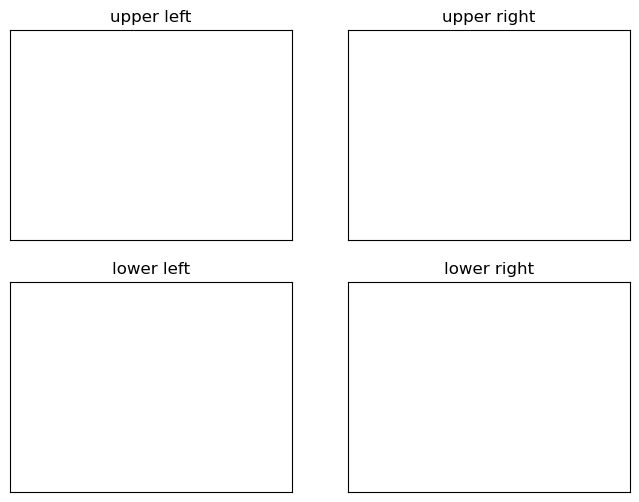

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,6))
axes[0,0].set(title='upper left')
axes[0,1].set(title='upper right')
axes[1,0].set(title='lower left')
axes[1,1].set(title='lower right')

for ax in axes.flatten():
    # Remove all xticks and yticks
    ax.set(xticks=[], yticks=[])
    
plt.show()


**Example 2:**

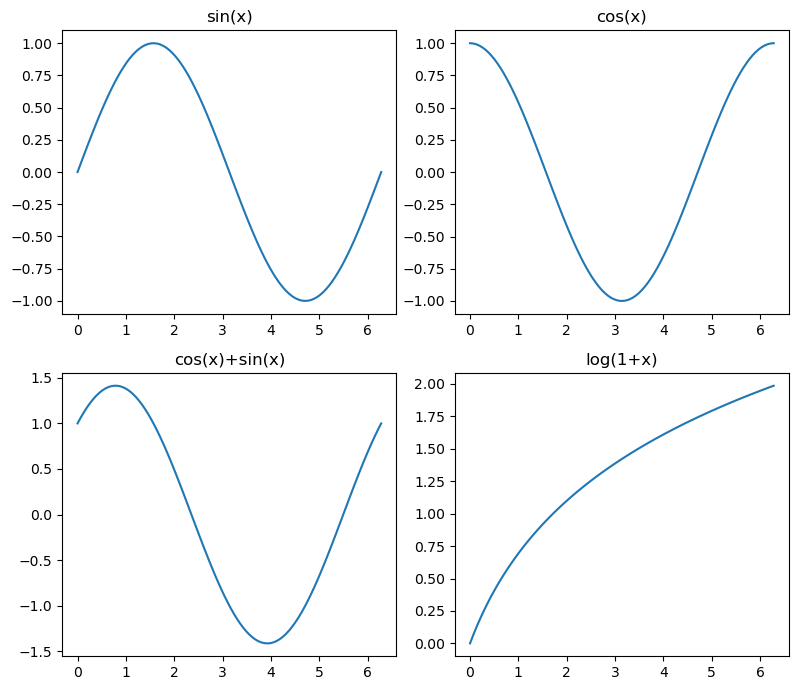

In [19]:
titles = ['sin(x)', 'cos(x)', 'cos(x)+sin(x)', 'log(1+x)']
x = np.linspace(0, 2*np.pi, 100)
f = [np.sin, np.cos, lambda x : np.cos(x)+np.sin(x), lambda x : np.log(1+x)]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,7))
for i, ax in enumerate(axes.flatten()):
    ax.plot(x, f[i](x))
    ax.set_title(titles[i])
    
plt.tight_layout()
plt.show()


#### **`Axes` Methods or `pyplot` Functions?**

Many methods of an `Axes` object also exist as functions in the `pyplot` module.

<br>

**Example:** When calling 

```python
    plt.xlim(-1, +1)
```

`pyplot` calls 

```python
    ax.set_xlim(-1, +1)
``` 
on the current `Axes` object.

<br>

**Recommendation:** 

+ `pyplot`: 
    
    + choose `pyplot` for simple plots and short scripts
    
    + `pyplot` functions are more concise than `Axes` methods

+ `Axes`:

    + choose the `Axes` approach for more complicated plots or large scripts

    + more flexible than `pyplot` functions

    + `Axes` and `Figure` objects can be passed as arguments

    + more advantageous in figures with multiple `Axes` objects


#### **Remark:**
Two other common ways to create `Figure` and `Axes` objects using the object-oriented interface of `matplotlib` are as follows:

1. The `Figure.add_subplot` method: 
    This method creates a new `Axes` object within a `Figure` object. You can specify the position of the `Axes` within the figure using the arguments of the `add_subplot` method. For example, to create a figure with two subplots arranged vertically, you can use the following code:

    ```python
        fig = plt.figure()
        ax1 = fig.add_subplot(2, 1, 1)
        ax2 = fig.add_subplot(2, 1, 2)
    ```

2. The `Figure.add_axes` method: 
    This method creates an `Axes` object within a `Figure` object at a specific position specified by a list of `[left, bottom, width, height]`. For example, to create a figure with an `Axes` that occupies the left half of the figure, you can use the following code:

    ```python
        fig = plt.figure()
        ax = fig.add_axes([0, 0, 0.5, 1])
    ```

These are just two examples of how you can create `Figure` and `Axes` objects using the object-oriented interface of `matplotlib`. For further details and other ways to create these objects, see the `matplotlib` documentation.